# EST- Project

# 1. Importing the data: 

In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer  

In [2]:
# Importing all the given datasets. Exploring shape and size. 
d1=pd.read_csv("TelcomCustomer-Churn_1.csv")

In [3]:
d1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No


In [4]:
d1.shape

(7043, 10)

In [5]:
d2=pd.read_csv("TelcomCustomer-Churn_2.csv")

In [6]:
d2

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
d2.shape

(7043, 11)

In [8]:
#Merged all datasets onto one and explored final shape and size.
d=pd.concat([d1,d2],axis=1)

In [9]:
d

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [10]:
d.shape

(7043, 21)

# 2. Data cleansing:

In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
#Missing value treatment
d.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
d.TotalCharges.value_counts()

20.2       11
           11
19.75       9
19.65       8
20.05       8
           ..
3023.85     1
955.15      1
3858.05     1
3199        1
599.25      1
Name: TotalCharges, Length: 6531, dtype: int64

In [14]:
#data backup
df = d.copy()

In [15]:
df.TotalCharges=df.TotalCharges.replace(' ',np.nan)

In [16]:
df=df.dropna()

In [17]:
df.SeniorCitizen.value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [18]:
#Converting categorical attributes to continuous and vise versa using relevant functional knowledge
df.TotalCharges=df.TotalCharges.astype('float64')
df.SeniorCitizen=df.SeniorCitizen.astype('object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [20]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# 3. Data analysis & visualisation:

In [21]:
#Performing detailed statistical analysis on the data
print(df.gender.value_counts())
print(df.SeniorCitizen.value_counts())
print(df.Partner.value_counts())
print(df.Dependents.value_counts())
print(df.PhoneService.value_counts())
print(df.MultipleLines.value_counts())
print(df.InternetService.value_counts())
print(df.OnlineSecurity.value_counts())
print(df.OnlineBackup.value_counts())
print(df.DeviceProtection.value_counts())
print(df.TechSupport.value_counts())
print(df.StreamingTV.value_counts())
print(df.StreamingMovies.value_counts())
print(df.Contract.value_counts())
print(df.PaperlessBilling.value_counts())
print(df.PaymentMethod.value_counts())
print(df.Churn.value_counts())

Male      3549
Female    3483
Name: gender, dtype: int64
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
No                     2809
Yes                

In [22]:
#droping customerID and changing Churn data Yes/No by 1/0
df=df.drop(columns=['customerID'])
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

<AxesSubplot:xlabel='Churn', ylabel='count'>

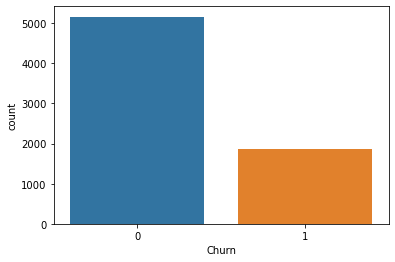

In [23]:
#ploting the graphs of different variable to see the distributions.
sns.countplot(x=df.Churn)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

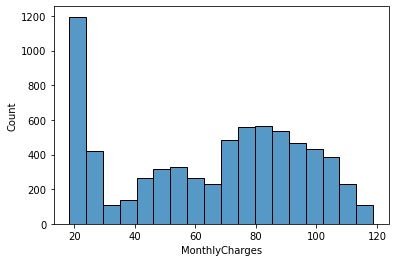

In [24]:
sns.histplot(df.MonthlyCharges)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

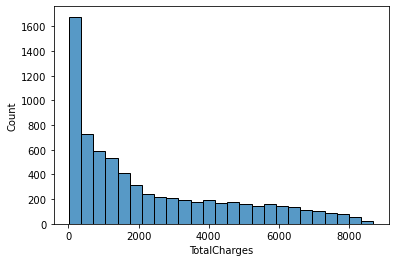

In [25]:
sns.histplot(df.TotalCharges)

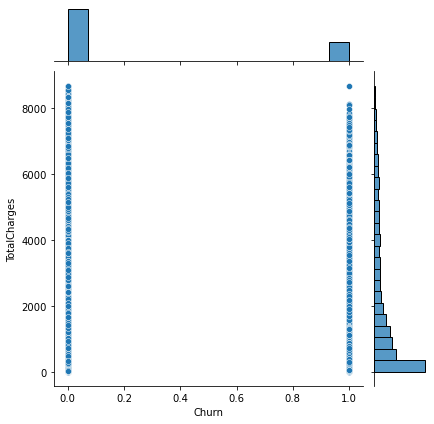

In [26]:
sns.jointplot(x=df.Churn,y=df.TotalCharges)

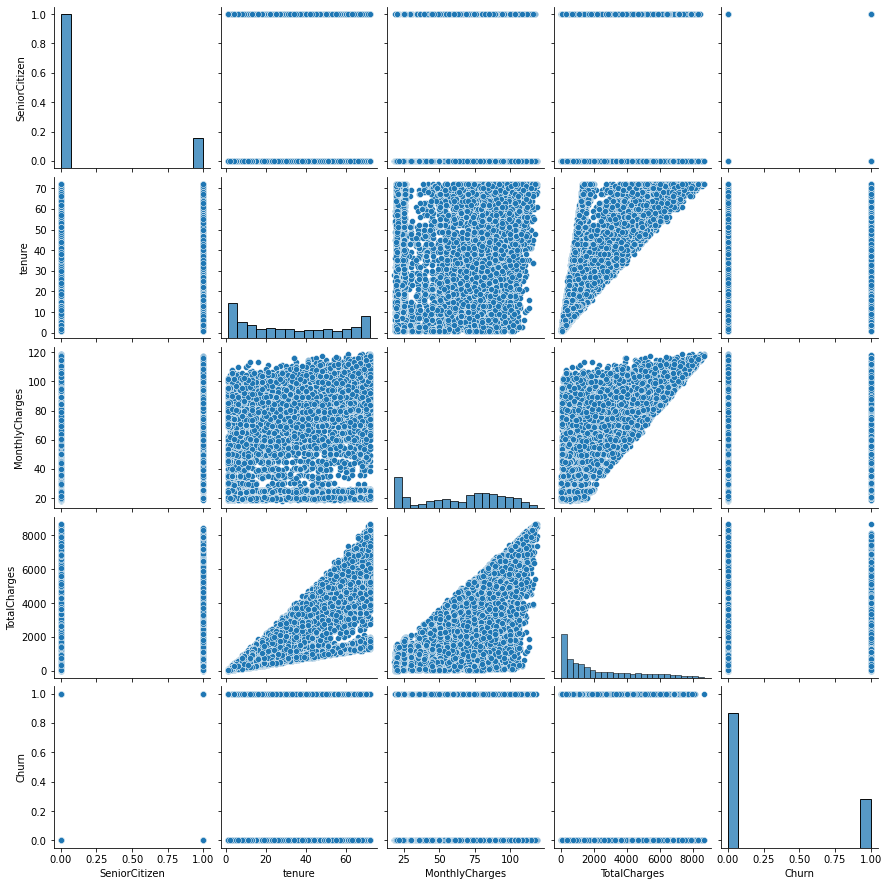

In [27]:
sns.pairplot(df)
plt.show()

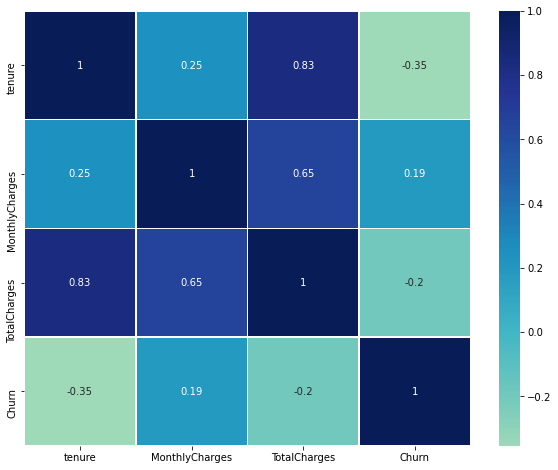

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cmap="YlGnBu")
plt.show()

# 4. Data pre-processing:

In [29]:
#Segregated predictors vs target attributes
x=df.drop(columns=['Churn'])
y=df.Churn

In [30]:
#Applied Dummy encoding on the data
x=pd.get_dummies(x)

In [31]:
x

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,1,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,0,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [32]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [33]:
#Performing train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)
X_train.shape,X_test.shape

((4922, 46), (2110, 46))

# 5. Model training and testing: 

In [34]:
# invoking the decision tree classifier function using 'entropy' method of finding the split columns. 

model_entropy=DecisionTreeClassifier(criterion='entropy')

In [35]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [36]:
# performance on train data
model_entropy.score(X_train, y_train)  

0.9979683055668428

In [37]:
# performance on test data
model_entropy.score(X_test, y_test)  

0.7203791469194313

# There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting.
#Regularized/pruned the decision tree by limiting the max. depth of trees and printed the accuracy.

In [38]:
# Restricting the depth of the tree to 5 and size of the leaf node to 5 
dt_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 22,
                                    max_depth=5, min_samples_leaf=5)
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=22)

In [39]:
preds_pruned_train = dt_pruned.predict(X_train)
preds_pruned = dt_pruned.predict(X_test)

In [40]:
print(accuracy_score(y_train,preds_pruned_train))
print(accuracy_score(y_test,preds_pruned))

0.802519301097115
0.7943127962085308


# Pruning 

In [41]:
path  = dt_pruned.cost_complexity_pruning_path(X_train,y_train)
path

{'ccp_alphas': array([0.        , 0.0006054 , 0.00081209, 0.00086179, 0.00092322,
        0.00098449, 0.00124294, 0.00131325, 0.0013847 , 0.00149981,
        0.00151905, 0.00216512, 0.00226103, 0.00240598, 0.00243981,
        0.00259709, 0.00290884, 0.00319023, 0.00370139, 0.00448282,
        0.00510382, 0.00566578, 0.00778084, 0.01095721, 0.01189423,
        0.01700779, 0.02675903, 0.13300018]),
 'impurities': array([0.58074557, 0.58135098, 0.58216307, 0.58388664, 0.58480986,
        0.58579435, 0.58703729, 0.58835054, 0.58973524, 0.59123505,
        0.5927541 , 0.59491922, 0.59718025, 0.59958623, 0.60202604,
        0.60462312, 0.60753196, 0.61072219, 0.61442358, 0.61890641,
        0.62401023, 0.62967601, 0.63745685, 0.64841407, 0.6603083 ,
        0.67731608, 0.70407511, 0.8370753 ])}

In [42]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [43]:
ccp_alphas = path.ccp_alphas
accuracy_cv =[]

for alpha in ccp_alphas:
    accuracy = cross_val_score(estimator = DecisionTreeClassifier(ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="accuracy" )
    accuracy_cv.append(np.mean(accuracy))
    
output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['accuracy_CV']=accuracy_cv

output.head()

,alpha,accuracy_CV
0,0.000000,0.733236
1,0.000605,0.781189
2,0.000812,0.793785
3,0.000862,0.796426
4,0.000923,0.793580


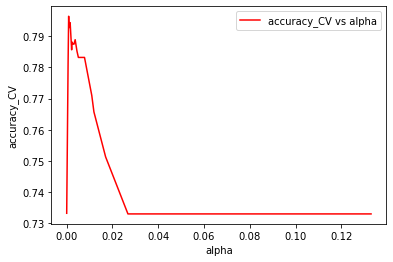

In [44]:
sns.lineplot(x='alpha', y='accuracy_CV', data=output , color='r', label="accuracy_CV vs alpha")
plt.show()

In [45]:
output.iloc[np.argmax(output['accuracy_CV']),]

alpha          0.000862
accuracy_CV    0.796426
Name: 3, dtype: float64

# Visualizing the tree

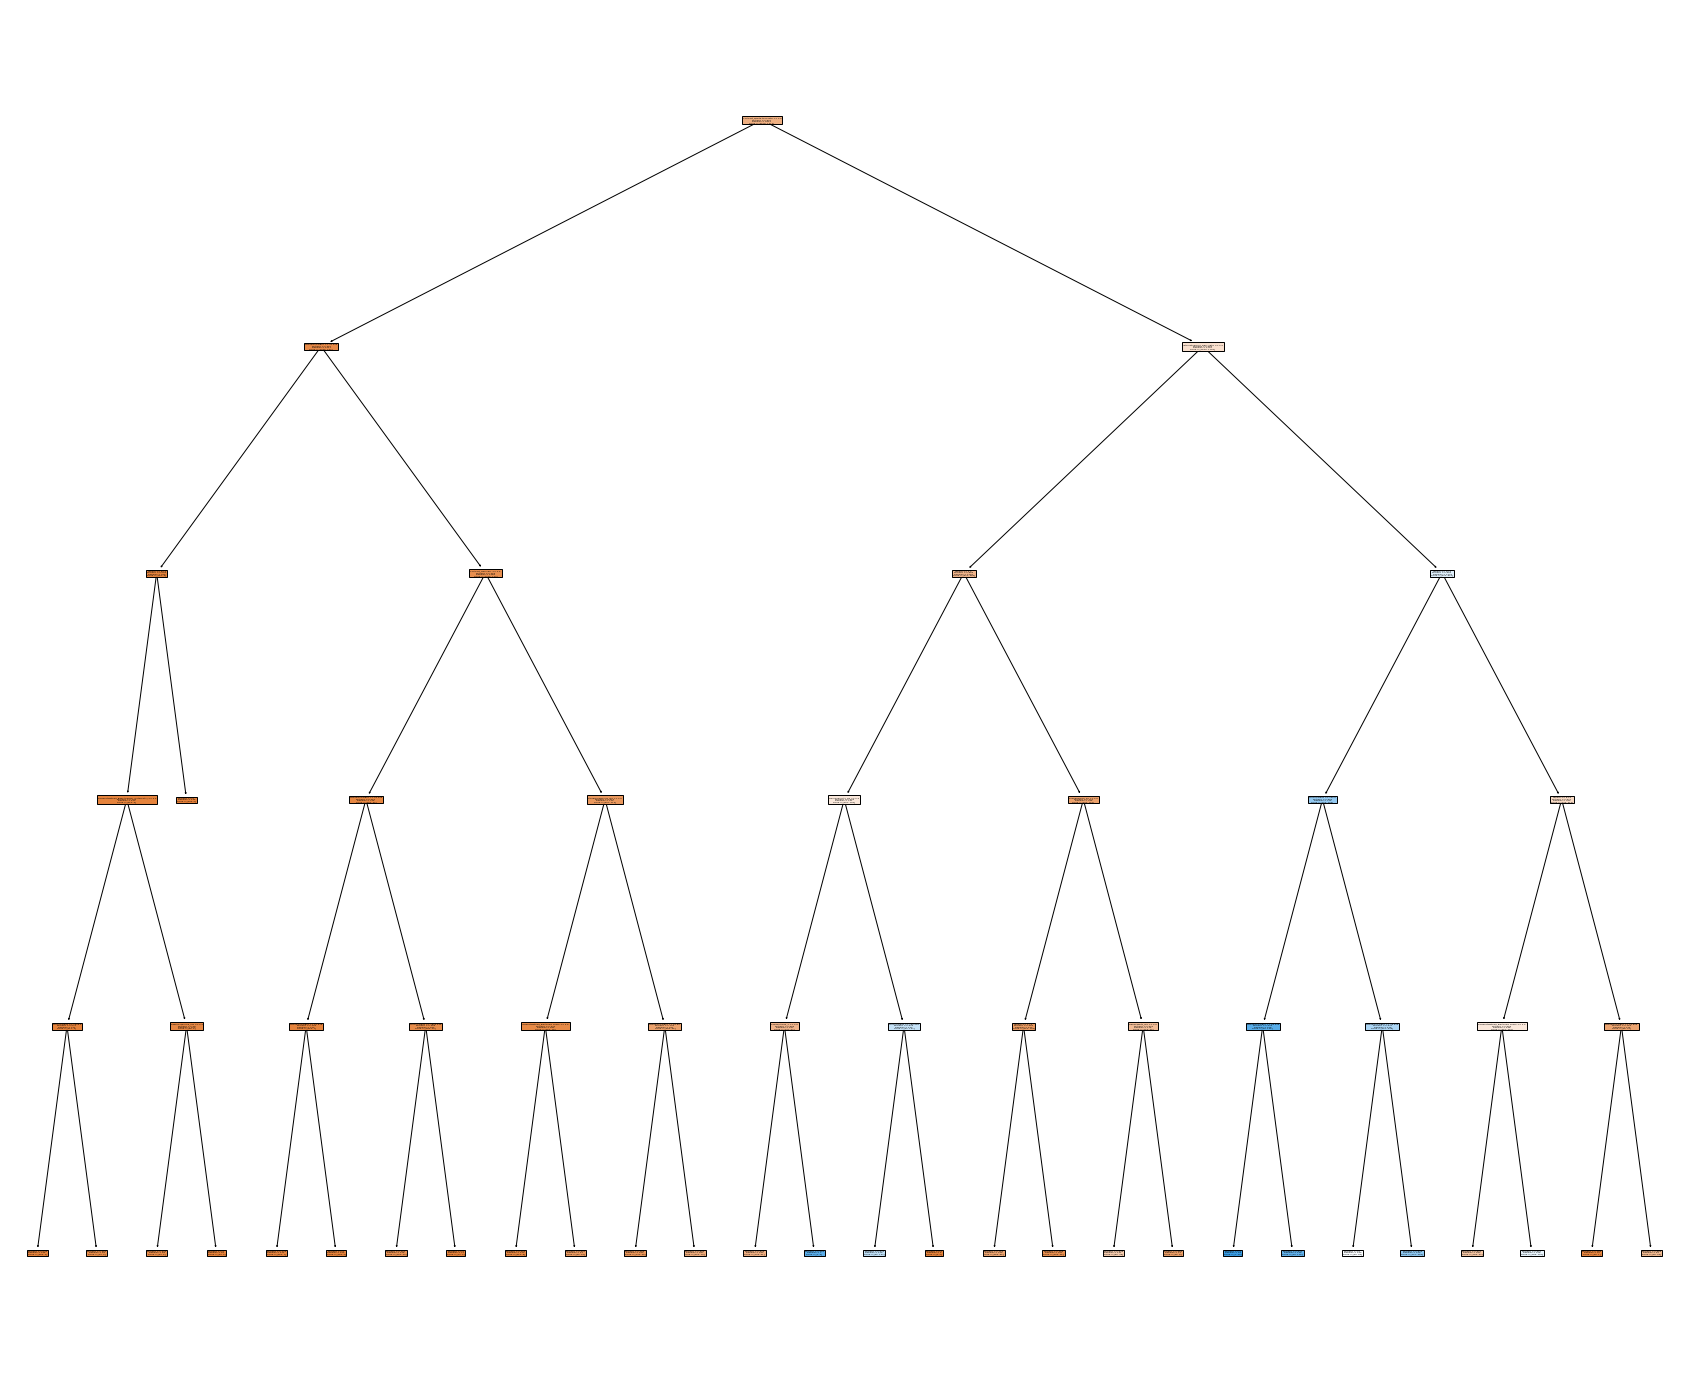

In [46]:
from sklearn import tree
fig = plt.figure(figsize=(30,25))
DT_plot = tree.plot_tree(dt_pruned, feature_names=X_train.columns, filled=True)

# Calculating feature importance


In [47]:
feat_importance = dt_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(x, dt_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
Contract_Month-to-month,0.518864
tenure,0.139855
InternetService_Fiber optic,0.104393
MonthlyCharges,0.086852
TotalCharges,0.036899
Contract_One year,0.030355
OnlineSecurity_No,0.022104
PaymentMethod_Electronic check,0.018372
StreamingMovies_Yes,0.017489
PhoneService_No,0.010132


In [48]:
# here we can see that there is high importance of Contract_Month-to-month,tenure and InternetService_Fiber optic columns in Churn prediction

In [49]:
print(metrics.classification_report(y_test, preds_pruned))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1555
           1       0.61      0.60      0.60       555

    accuracy                           0.79      2110
   macro avg       0.73      0.73      0.73      2110
weighted avg       0.79      0.79      0.79      2110



In [50]:
#Stored the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': accuracy_score(y_test,preds_pruned)})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.794313


# Applying the Random forest model and printing the accuracy of Random forest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [52]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [53]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.794313
0,Random Forest,0.774408


# Applying Adaboost Ensemble Algorithm for the same data and printed the accuracy

In [54]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [55]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [56]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.794313
0,Random Forest,0.774408
0,Adaboost,0.800948


# Adaboost classifier performs better than Decision tree  as well as Random forest

# Applying Bagging Classifier Algorithm and printing the accuracy.

In [57]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [58]:
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [59]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.794313
0,Random Forest,0.774408
0,Adaboost,0.800948
0,Bagging,0.785308


# Applying GradientBoost Classifier Algorithm for the same data and printing the accuracy

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [61]:
pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [62]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Decision Tree,0.794313
0,Random Forest,0.774408
0,Adaboost,0.800948
0,Bagging,0.785308
0,Gradient Boost,0.799526


# Here we can see that for this dataset, Adaboost, Decision Tree and Gradient Boost models given the best results on test predictions

# 6. Conclusion and improvisation: 

In [63]:
# As we have seen in the analysis, we have applied different Ensemble Techniques on the data set , to findout best models that 
#can give us best accuracy of the data. First of all we had applied Decision Tree on the dataset,which gave us better accuracy in 
#the training data while less accuracy in the testing dataset, but that model got overfitted, Thatswhy we had to restrict the depth of
#the tree to 5 which gave us good accuracy as compare to previous model.After that we had applied different models on the dataset
#and compared the accuracy of each models. We found that Adaboost model gave us best accuracy as compared to other models.
# So we can take this one for our final model selection. Apart from adaboost model some other models such as Gradient Boost and Decision Tree
#also given good accuracy as compare to Random forest and Bagging . But in Decision tree we have seen that there more chances of overfitting
# thatswhy we'll give preference to Adaboost model compare to other midels. Also It is one of the most accurate algorithms present out there because of the number of decision trees taking part in the process.

In [64]:
# While talking about improvements on the data points collected by the telecom operator, I think he can also add some features in
# the dataset like income of consumer, type of Employement like he is doing private job, government job, or has his own bussiness
#or he is unemployed, also can add location of consumer because we see that in the Urban area people use more technology based product
# as compared to rural areas. So I think like these some features, telecom operator can collect to perform a better data analysis in future 